In [2]:
"""
Landon Buell
Kevin Short
PHYS 799 - B.S. Thesis
22 Sept 2020
"""

        #### IMPORTS ####

import numpy as np
import matplotlib.pyplot as plt

In [9]:
def PlotFunction (X,Y,namesave):
    """ Plot function X,Y"""
    plt.figure(figsize=(24,8))
    plt.xlabel("Input \t $\\vec{z}^{(l)}$",size=60,weight='bold')
    plt.ylabel("Output \t $\\vec{x}^{(l)}$",size=60,weight='bold')
    
    plt.plot(X,Y,'-',color="blue",linewidth=4)
    
    plt.xticks(size=20)
    plt.yticks(size=20)
    
    plt.hlines(0,-100,+100,color='black')
    plt.vlines(0,-10,+100,color='black')
    
    plt.grid()
    plt.tight_layout()
    plt.savefig(namesave+".png")
    plt.show()

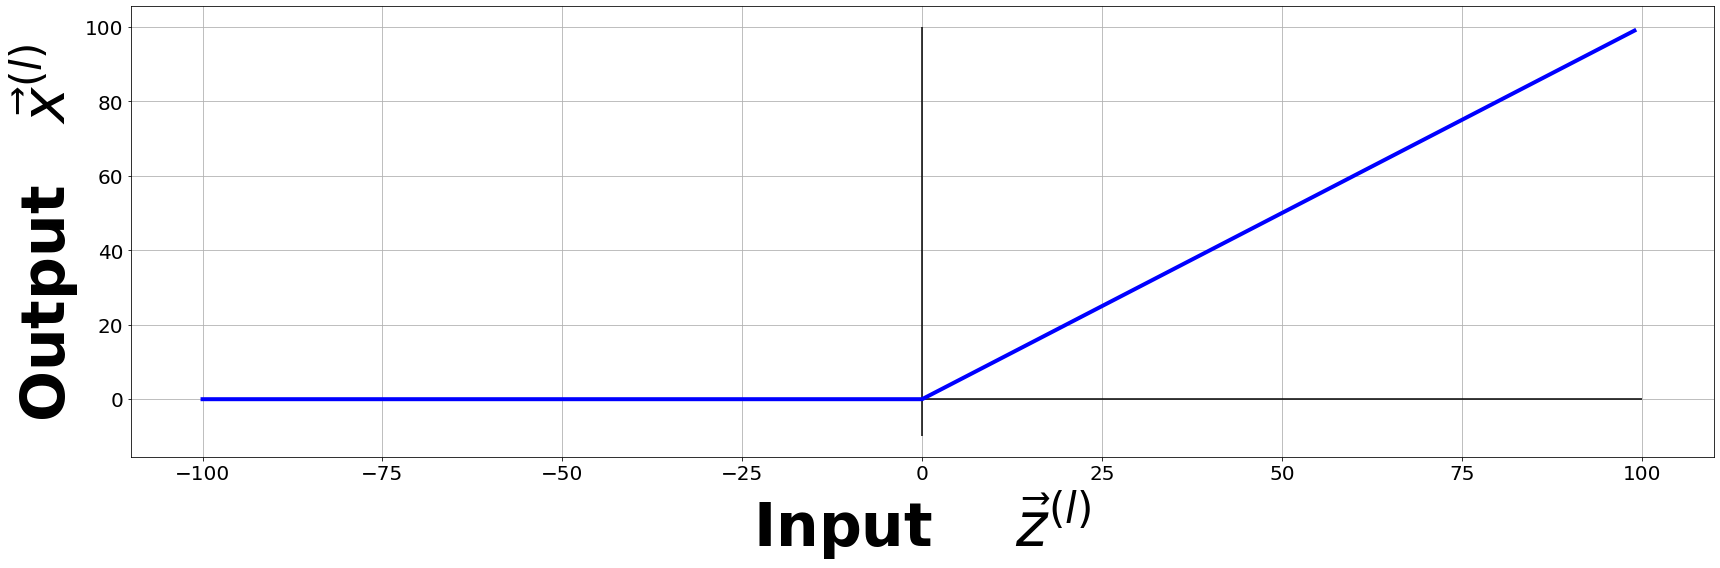

In [10]:
def ReLU (X):
    """ Compute element-wise ReLU(X) """
    return np.array([np.max([0,x]) for x in X])

x = np.arange(-100,+100)
y = ReLU(x)

PlotFunction(x,y,"RectifiedLinearUnit")